In [147]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

start= dt.datetime(2007,1,1) #데이터 마지노선
end=dt.date.today()
#주가수정비율 반영 -> adjust_price=True
s=web.YahooDailyReader('000660.KS',start,end,adjust_price=True).read() #sk하이닉스 종목, KS:코스피, KQ:코스닥
print(s.head(15))
s.tail()
# s=web.YahooDailyReader('005490.KS',start,end,adjust_price=True).read() #POSCO
s.tail()

                    High           Low          Open         Close  \
Date                                                                 
2007-01-02  30076.150962  29395.332631  29555.525179  29996.054688   
2007-01-03  30196.293723  29595.571699  30076.149318  29675.667969   
2007-01-04  30076.150019  29515.476118  29715.716797  29715.716797   
2007-01-05  30076.150962  29155.043808  29956.006550  29996.054688   
2007-01-08  29915.957803  29235.139486  29795.813394  29395.332031   
2007-01-09  29715.716421  29235.138797  29435.379474  29355.283203   
2007-01-10  29715.714309  28914.751659  29635.618044  29235.136719   
2007-01-11  29595.577019  28914.758603  29515.480735  29074.951172   
2007-01-12  29275.191299  28514.276614  29195.095016  29155.046875   
2007-01-15  29635.618044  29114.992321  29235.136719  29235.136719   
2007-01-16  29235.139443  28554.321127  29155.043170  28714.513672   
2007-01-17  28674.462808  27432.970703  28674.462808  27432.970703   
2007-01-18  27513.07

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2019-01-29,73800.0,71000.0,71400.0,73400.0,3368642.0,1.0
2019-01-30,76300.0,73000.0,73500.0,75900.0,5304841.0,1.0
2019-01-31,77100.0,73700.0,76900.0,73900.0,4447535.0,1.0
2019-02-01,76400.0,74700.0,75400.0,75900.0,3349965.0,1.0
2019-02-19,74800.0,73000.0,74500.0,73700.0,1458035.0,1.0


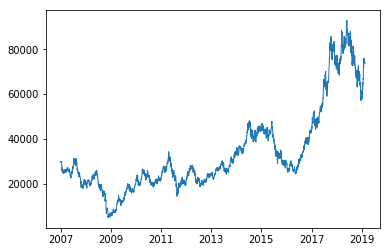

In [148]:
plt.plot(s['Close'],linewidth=1)

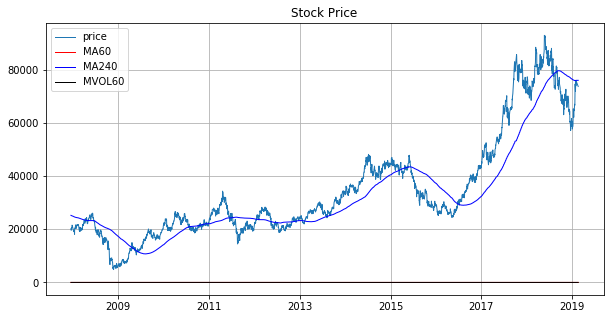

In [149]:
import numpy as np
s['Rtn']=np.log(s['Close'])-np.log(s['Close'].shift(1))
s['sma60']=s['Rtn'].rolling(window=120).mean()*252
s['MRtn']=s['Rtn'].rolling(window=120).mean()*252
s['sma240']=s['Close'].rolling(window=240).mean()
s['smvol60']=s['sma60'].rolling(window=120).std()*np.sqrt(252)
s=s.dropna()

plt.figure(1,figsize=(10,5))
plt.plot(s['Close'],linewidth=1, label="price")
plt.plot(s['sma60'],linewidth=1,c='r', label="MA60")
plt.plot(s['sma240'],linewidth=1,c='b', label="MA240")
plt.plot(s['smvol60'], linewidth=1,c='black',label="MVOL60")
plt.title("Stock Price")
plt.grid()
plt.legend()
plt.show()

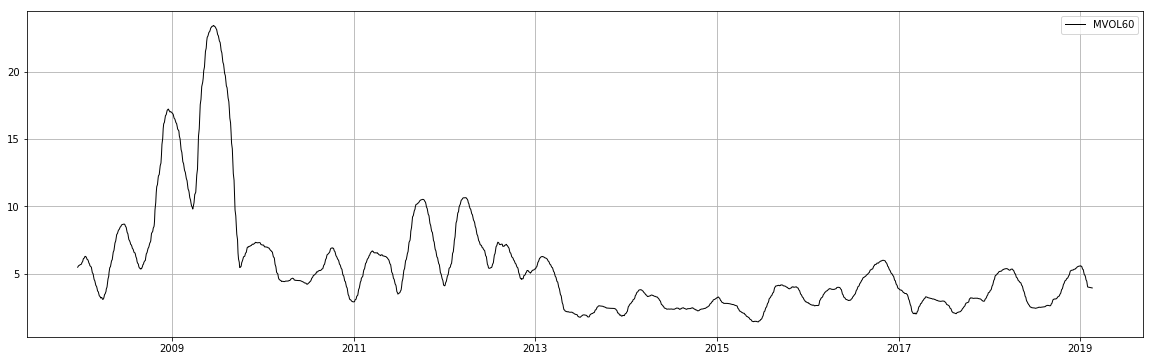

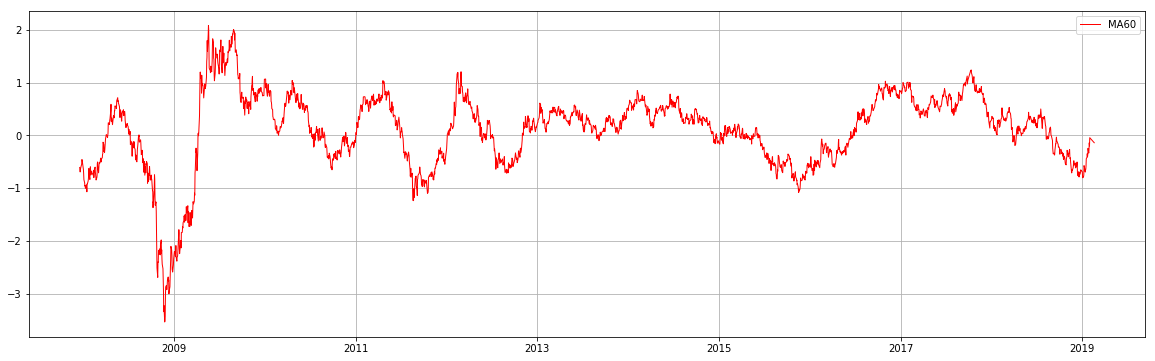

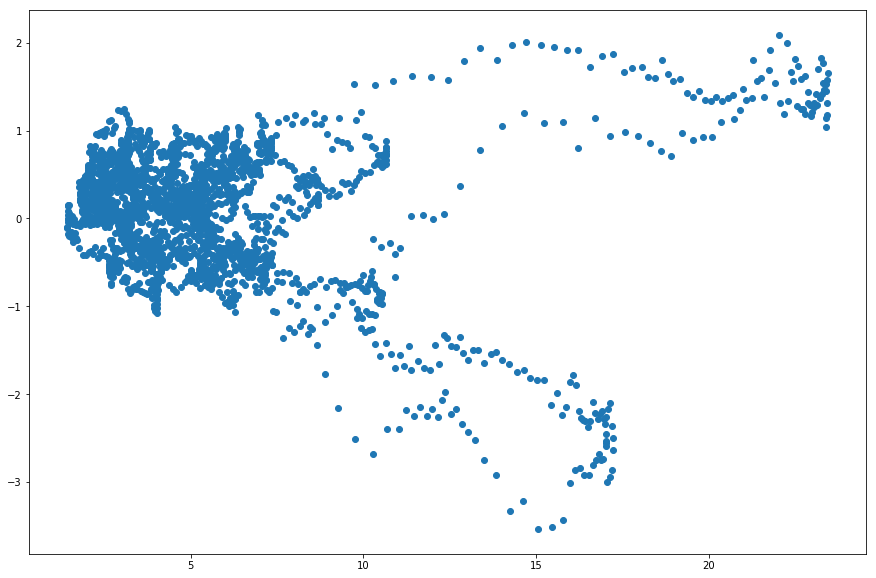

In [150]:
plt.figure(1,figsize=(20,6))
plt.plot(s['smvol60'], linewidth=1,c='black',label="MVOL60")
plt.grid()
plt.legend()
plt.show()
plt.figure(1,figsize=(20,6))
plt.plot(s['sma60'],linewidth=1,c='r', label="MA60")
plt.grid()
plt.legend()
plt.show()
plt.figure(1,figsize=(15,10))
plt.scatter(s['smvol60'],s['sma60'])

### 일일수익률 계산 p.8

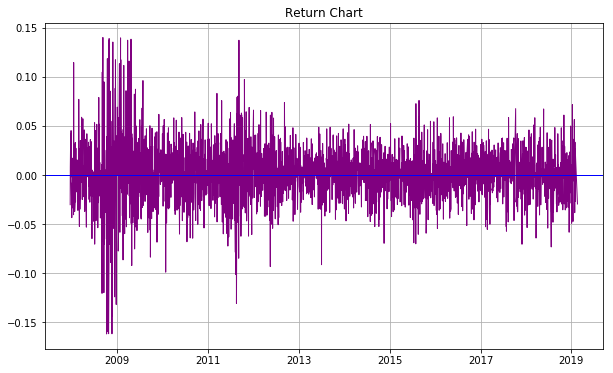

In [151]:

s['Rtn']=np.log(s['Close'])-np.log(s['Close'].shift(1))
s=s.dropna()

plt.figure(figsize=(10,6))
plt.plot(s['Rtn'],c='purple',linewidth=1)
plt.axhline(y=0,c='b',linewidth=1)
plt.title("Return Chart")
plt.grid()

### 수익률 분포(일일수익률 그래프를 세로로 회전시켰을 때)

Bin:-0.0561, Frequency=12
Bin:-0.0531, Frequency=15
Bin:-0.0501, Frequency=14
Bin:-0.0470, Frequency=25
Bin:-0.0440, Frequency=25
Bin:-0.0410, Frequency=28
Bin:-0.0380, Frequency=37
Bin:-0.0350, Frequency=47
Bin:-0.0320, Frequency=59
Bin:-0.0289, Frequency=60
Bin:-0.0259, Frequency=66
Bin:-0.0229, Frequency=78
Bin:-0.0199, Frequency=81
Bin:-0.0169, Frequency=100
Bin:-0.0139, Frequency=102
Bin:-0.0108, Frequency=129
Bin:-0.0078, Frequency=132
Bin:-0.0048, Frequency=159
Bin:-0.0018, Frequency=174
Bin:0.0012, Frequency=183
Bin:0.0042, Frequency=139
Bin:0.0073, Frequency=133
Bin:0.0103, Frequency=126
Bin:0.0133, Frequency=108
Bin:0.0163, Frequency=79
Bin:0.0193, Frequency=80
Bin:0.0223, Frequency=73
Bin:0.0254, Frequency=69
Bin:0.0284, Frequency=53
Bin:0.0314, Frequency=44
Bin:0.0344, Frequency=51
Bin:0.0374, Frequency=44
Bin:0.0405, Frequency=28
Bin:0.0435, Frequency=18
Bin:0.0465, Frequency=15
Bin:0.0495, Frequency=17
Bin:0.0555, Frequency=17


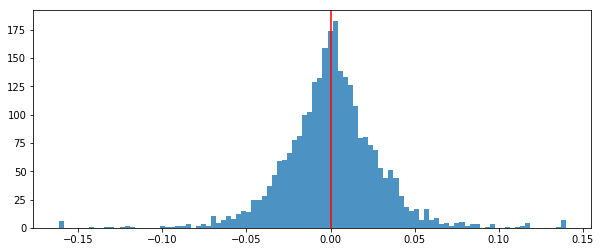

In [152]:
plt.figure(figsize=(10,4))
n,bins,patched=plt.hist(s['Rtn'],bins=100,alpha=0.8)
plt.axvline(s['Rtn'].mean(),c='r')

#각 구간의 빈도
for index in range(len(n)):
    if (n[index] >10):
        print("Bin:%.4f, Frequency=%d" % (bins[index],n[index]))

In [153]:
s['Rtn'].mean()*252

0.11811004555442733

In [154]:
s['Rtn'].std()*(252**(1/2))

0.4638849323555496

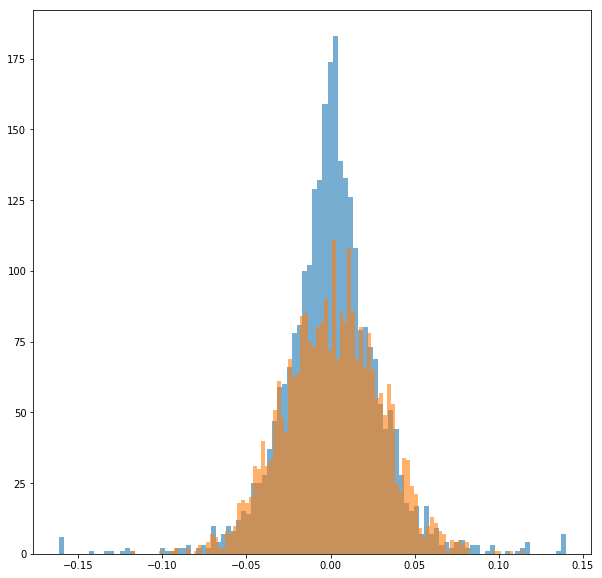

In [155]:
mu=s['Rtn'].mean()
std=s['Rtn'].std()
nordist=np.random.normal(mu,std,len(s))
plt.figure(figsize=(10,10))
_, _, _= plt.hist(s['Rtn'],bins=100,alpha=0.6)
_, _, _= plt.hist(nordist,bins=100,alpha=0.6)
plt.show()

Text(0.5,1,'a=0.99')

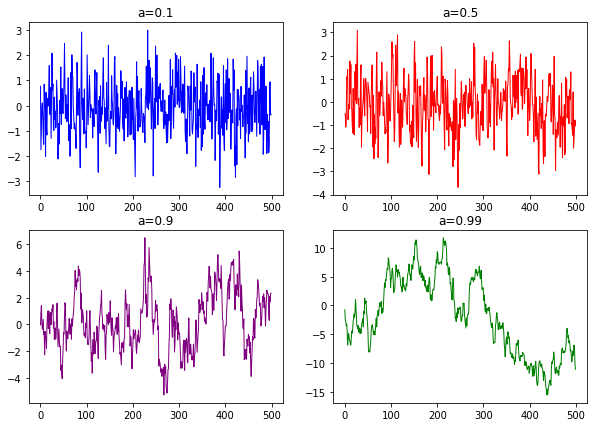

In [156]:
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA
from statsmodels.tsa.arima_model import ARIMA
y1=sampleARIMA(ar=[0.1], d=0, ma=[0], n=500)
y2=sampleARIMA(ar=[0.5], d=0, ma=[0], n=500)
y3=sampleARIMA(ar=[0.9], d=0, ma=[0], n=500)
y4=sampleARIMA(ar=[0.99], d=0, ma=[0], n=500)

fig=plt.figure(figsize=(10,7))
p1=fig.add_subplot(2,2,1)
p2=fig.add_subplot(2,2,2)
p3=fig.add_subplot(2,2,3)
p4=fig.add_subplot(2,2,4)

p1.plot(y1,color='b', linewidth=1)
p2.plot(y2,color='r', linewidth=1)
p3.plot(y3,color='purple', linewidth=1)
p4.plot(y4,color='g', linewidth=1)

p1.set_title("a=0.1")
p2.set_title("a=0.5")
p3.set_title("a=0.9")
p4.set_title("a=0.99")

In [157]:
#AR(1)의 a추정,AR(2)는 변수2개
y=sampleARIMA(ar=[0.5],d=0,ma=[0],n=500)
model=ARIMA(y,order=(1,0,0)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(1, 0)   Log Likelihood                -710.346
Method:                       css-mle   S.D. of innovations              1.002
Date:                Tue, 19 Feb 2019   AIC                           1426.693
Time:                        16:29:58   BIC                           1439.336
Sample:                             0   HQIC                          1431.654
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1543      0.075      2.066      0.039       0.008       0.301
ar.L1.y        0.4008      0.041      9.792      0.000       0.321       0.481
                                    Roots           

In [158]:
model=ARIMA(s['Close'],order=(1,0,0)).fit()
print(model.summary())
print(s['sma60'])

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2759
Model:                     ARMA(1, 0)   Log Likelihood              -22751.316
Method:                       css-mle   S.D. of innovations            921.600
Date:                Tue, 19 Feb 2019   AIC                          45508.633
Time:                        16:29:58   BIC                          45526.401
Sample:                             0   HQIC                         45515.051
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.424e+04   1.69e+04      2.022      0.043    1048.958    6.74e+04
ar.L1.Close     0.9992      0.001   1339.121      0.000       0.998       1.001
                                    Roots       

C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(2, 0)   Log Likelihood                -695.234
Method:                       css-mle   S.D. of innovations              0.972
Date:                Tue, 19 Feb 2019   AIC                           1398.468
Time:                        16:29:58   BIC                           1415.326
Sample:                             0   HQIC                          1405.083
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0658      0.033      2.004      0.046       0.001       0.130
ar.L1.y        0.0997      0.040      2.464      0.014       0.020       0.179
ar.L2.y       -0.4235      0.040    -10.477      0.0

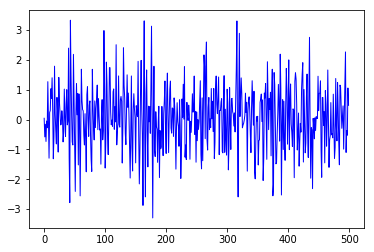

In [159]:
y=sampleARIMA(ar=[0.1,-0.4],d=0,ma=[0],n=500)
plt.plot(y, c="b",linewidth=1)
model=ARIMA(y,order=(2,0,0)).fit()
print(model.summary())

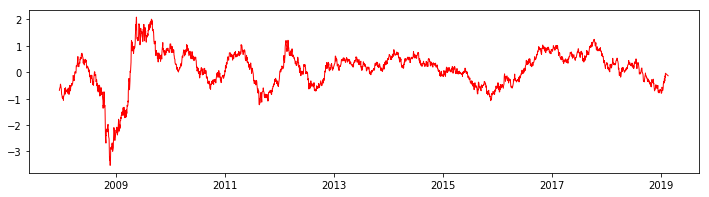

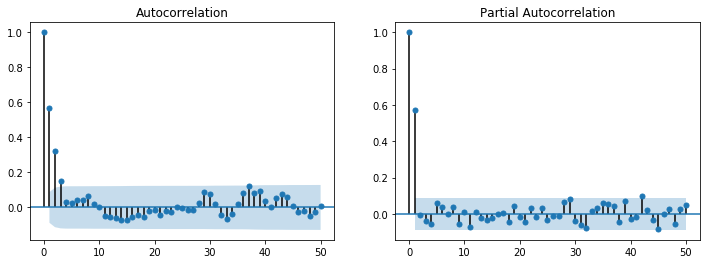

In [160]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y=sampleARIMA(ar=[0.5],d=0,ma=[0],n=500)
fig=plt.figure(figsize=(12,3))
plt.plot(s['MRtn'],color='red',linewidth=1)
plt.show()

fig=plt.figure(figsize=(12,4))
p1=fig.add_subplot(1,2,1)
p2=fig.add_subplot(1,2,2)
plot_acf(y,p1,lags=50)
plot_pacf(y,p2,lags=50)
plt.show()

## 잔차를 무시하기 위해서(의미있는 데이터x) 정규분포를 따르는지 확인해보기

C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anac\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


                              ARMA Model Results                              
Dep. Variable:                   MRtn   No. Observations:                 2759
Model:                     ARMA(2, 0)   Log Likelihood                2812.214
Method:                       css-mle   S.D. of innovations              0.087
Date:                Tue, 19 Feb 2019   AIC                          -5616.427
Time:                        16:29:58   BIC                          -5592.737
Sample:                             0   HQIC                         -5607.870
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0519      0.212      0.246      0.806      -0.363       0.466
ar.L1.MRtn     1.0042      0.019     52.751      0.000       0.967       1.041
ar.L2.MRtn    -0.0117      0.019     -0.613      0.5

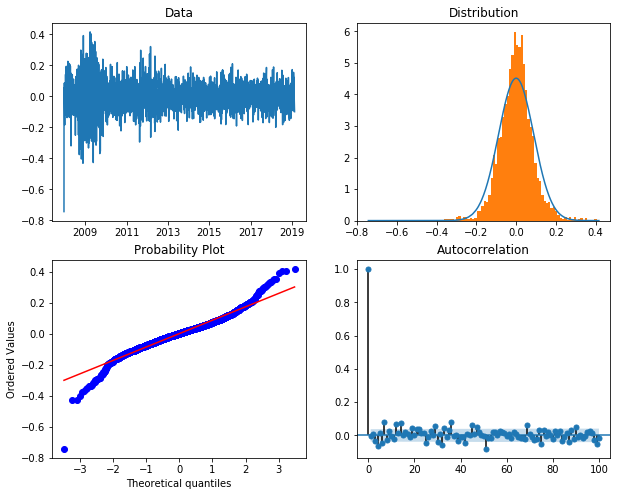

In [161]:
from MyUtil.MyTimeSeries import sampleARIMA, checkNormality
from statsmodels.tsa.arima_model import ARIMA

y=sampleARIMA(ar=[0.5,-0.5],d=0,ma=[0],n=1000)
model=ARIMA(s['MRtn'],order=(2,0,0))
model_fit=model.fit()
print(model_fit.summary())

residual=model_fit.resid #resid는 잔차를 의미 yt-ay_t-1-by_t-2(=잔차)
checkNormality(residual) #잔차의 정규분포 특성을 육안으로 확인
#2번째 파란선이 정규분포
#3번째 그래프는Q-Qplot 두번째 그래프 직선으로 2,3,4번째 정규분포 잘 따르믈고 AR(2)가 잘 들어맞는다는 것을 알 수 있다.


C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


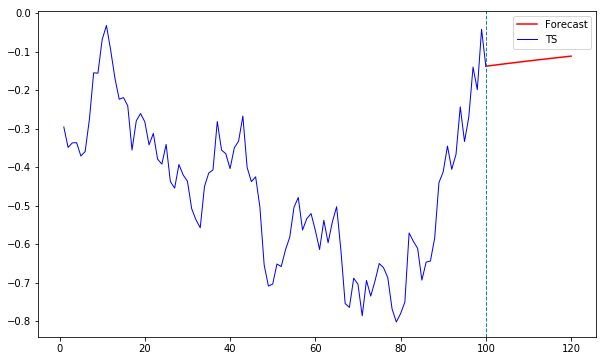

In [163]:
model=ARIMA(s['MRtn'],order=(1,0,0))
model_fit=model.fit()
y=s['MRtn']

forecast=model_fit.forecast(steps=20)[0] #[0]에 예측한 10일 데이터 모두 들어있
forecast=np.r_[y[-1],forecast]
ytail=y[len(y)-100:]
ax1=np.arange(1,len(ytail)+1)
ax2=np.arange(len(ytail),len(ytail)+len(forecast))
plt.figure(figsize=(10,6))
plt.plot(ax2,forecast,c='r',label='Forecast')
plt.plot(ax1,ytail,c='b',label='TS',linewidth=1)
plt.axvline(x=ax1[-1],linestyle='dashed',linewidth=1)
plt.legend()
plt.show()


Text(0.5,1,'b=0.99')

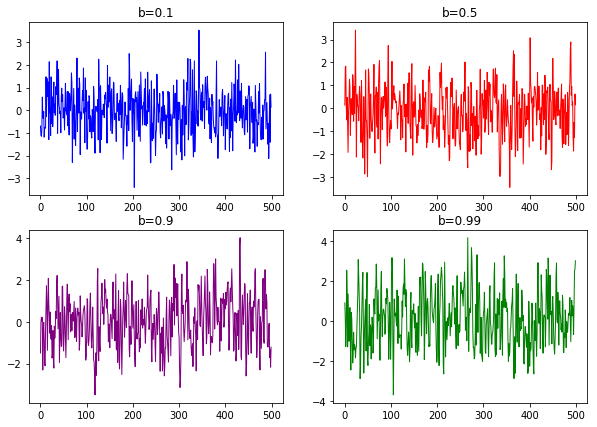

In [165]:

y1=sampleARIMA(ar=[0], d=0, ma=[0.1], n=500)
y2=sampleARIMA(ar=[0], d=0, ma=[0.5], n=500)
y3=sampleARIMA(ar=[0], d=0, ma=[0.9], n=500)
y4=sampleARIMA(ar=[0], d=0, ma=[0.99], n=500)

fig=plt.figure(figsize=(10,7))
p1=fig.add_subplot(2,2,1)
p2=fig.add_subplot(2,2,2)
p3=fig.add_subplot(2,2,3)
p4=fig.add_subplot(2,2,4)

p1.plot(y1,color='b', linewidth=1)
p2.plot(y2,color='r', linewidth=1)
p3.plot(y3,color='purple', linewidth=1)
p4.plot(y4,color='g', linewidth=1)
# b는 정상성을 따르지 않음을 알 수 있다
p1.set_title("b=0.1")
p2.set_title("b=0.5")
p3.set_title("b=0.9")
p4.set_title("b=0.99")